In [1]:
import numpy as np
import matplotlib.pyplot as plt
import starry

import exoplanet as exo


In [2]:
map = starry.Map(ydeg=20, udeg=2, rv=True, lazy=False)


In [4]:
time, vels, verr = np.loadtxt('../data/vst222259.ascii', usecols=[1,2,3], unpack=True)

time = time[:-4]
vels = vels[:-4]
verr = verr[:-4]

time -= 18706.5

In [60]:
Prot = 2.85             # days
P = 8.1387              # days
t0 = 0.168
e = 0.0                   
w = 0.0
inc = 90.0


vsini = 18.3 * 1e3      # m /s
r = 0.06472             # In units of Rstar
b = -0.40               # I want it to transit in the South!
a = 19.42               # In units of Rstar
u1 = 0.95
u2 = 0.20
obl = -0
gamma = 95
gammadot = 100
gammadotdot = 800

spot_amp = -0.02
spot_sig = 0.04
spot_lon = 23
spot_lat = 30

veq = vsini / np.sin(inc * np.pi / 180.0)

<ErrorbarContainer object of 3 artists>

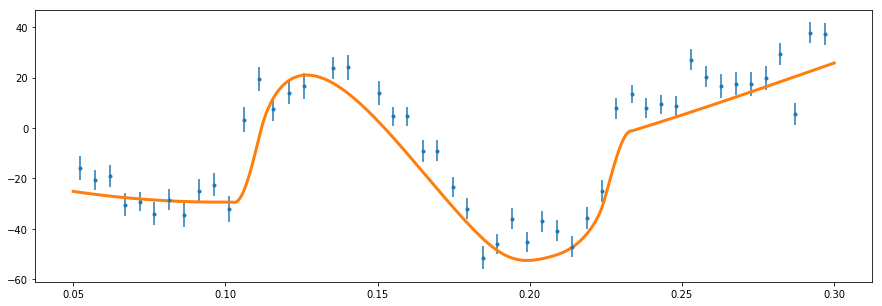

In [61]:
map.reset()
map.inc = inc
map.obl = obl
#map.add_spot(spot_amp, sigma=spot_sig, lon=spot_lon, lat=-spot_lat)
map[1:] = [u1, u2]
map.veq = veq

orbit = exo.orbits.KeplerianOrbit(period=P, a=a, t0=t0, b=b, ecc=e, omega=w, r_star=1.0) 


t = np.linspace(0.05, 0.30, 1000)


map.add_spot(spot_amp, sigma=spot_sig, lon=spot_lon, lat=spot_lat)

f = (t - t0)/P*2*np.pi
I = np.arccos(b/a)

zo = a*np.cos(f) 
yo = -a*np.sin(np.pi/2+f)*np.cos(I)
xo = a*np.sin(f)*np.sin(I)


theta = 360.0 / Prot * t

rv = map.rv(xo=xo, yo=yo, zo=zo, ro=r, theta=theta)
rv += gamma 
    

plt.figure(figsize=(15,5))
plt.plot(t, rv, "C1", lw=3)
plt.errorbar(time, vels, yerr=verr, fmt='.')
#plt.ylim(-100, 40);

Compiling `compute_RV_filter`... Done.
Compiling `render`... Done.


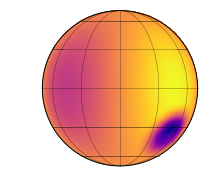

In [19]:
map.show()